# <b>CS156 (Introduction to AI), Spring 2022</b>
# <u><b>Homework 3 submission</b></u>

### Roster Name: Benjamin Wu
### Student ID: 013607880
### Email address: benjamin.wu01@sjsu.edu

##  <u>References and sources </u>

https://www.statology.org/pandas-select-column-by-index/

##  <u>Solution</u>

#### Load libraries and set random number generator seed

In [50]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.datasets import load_boston
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [51]:
np.random.seed(42)

#### Code the solution

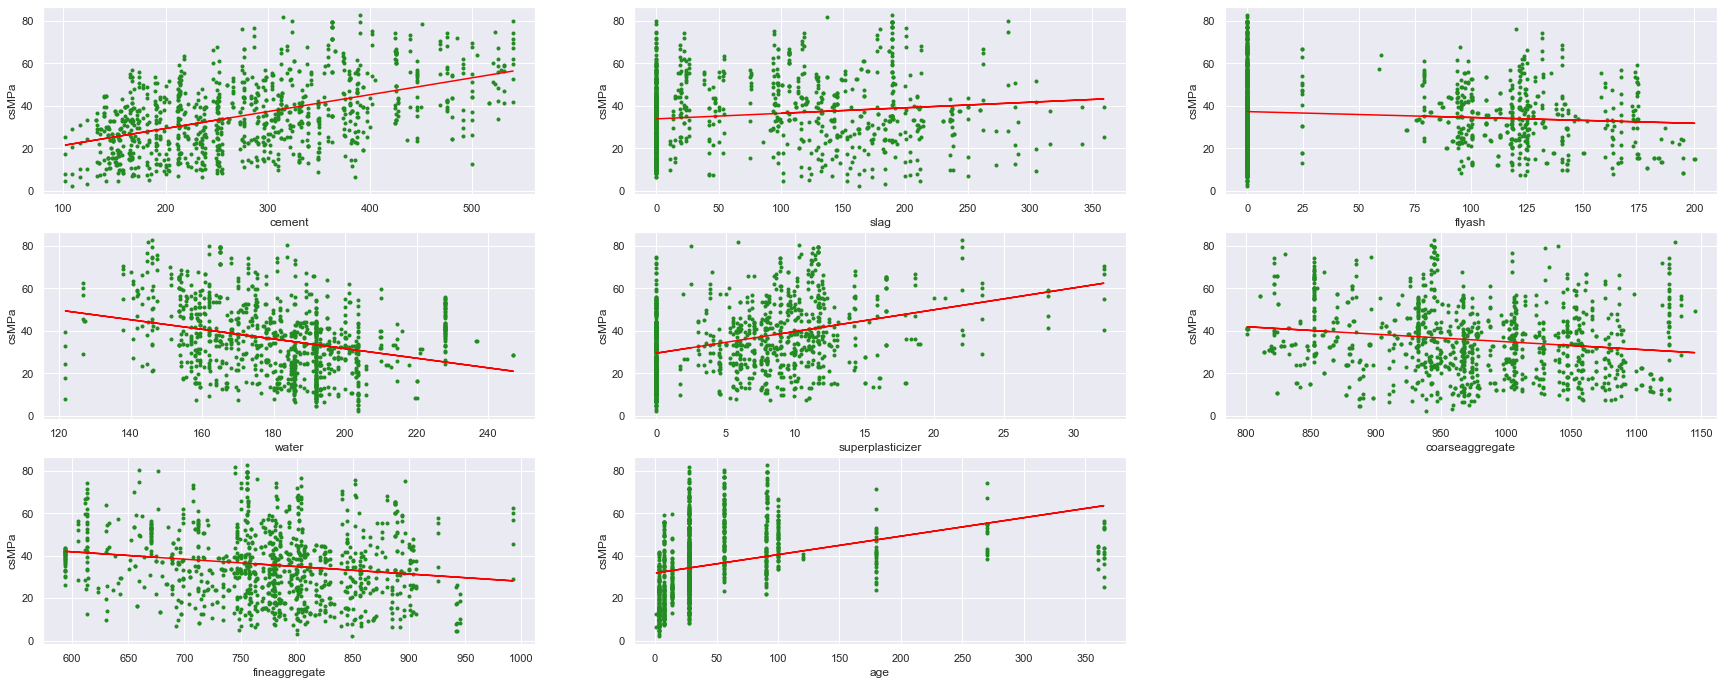

In [52]:
df = pd.read_csv("homework3_input_data.csv")


plt.figure(figsize=(30,20))
for i, col in enumerate(df.columns[0:8]):
    plt.subplot(5, 3, i+1)
    x = df[col]
    y = df['csMPa']
    plt.plot(x, y, '.', color="forestgreen")
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b, color="red")
    plt.xlabel(col)
    plt.ylabel('csMPa')


<AxesSubplot:>

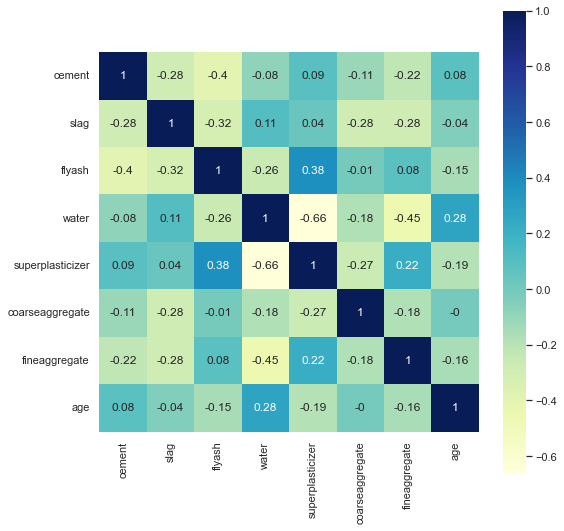

In [53]:
features = df[['cement','slag','flyash','water','superplasticizer','coarseaggregate','fineaggregate','age']]
sns.set(rc={'figure.figsize': (8.5,8.5)})
sns.heatmap(features.corr().round(2), square=True, cmap='YlGnBu', annot=True)

### Splitting data into training and test datasets

In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(df.iloc[:, 0:8], df.iloc[:, 8], test_size=0.2, random_state=0)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((824, 8), (824,), (206, 8), (206,))

### Training model

In [55]:
model = linear_model.LinearRegression().fit(X_train, Y_train)
Y_test_pred = model.predict(X_test)

### Calculating mean squared error and coefficient of determination

In [56]:
print('Mean squared error: %.2f' % mean_squared_error(Y_test, Y_test_pred))
print('Coefficient of determination: %.2f' % r2_score(Y_test, Y_test_pred))

Mean squared error: 95.62
Coefficient of determination: 0.64


### Graphing predicted vs actual csMPa

<function matplotlib.pyplot.show(close=None, block=None)>

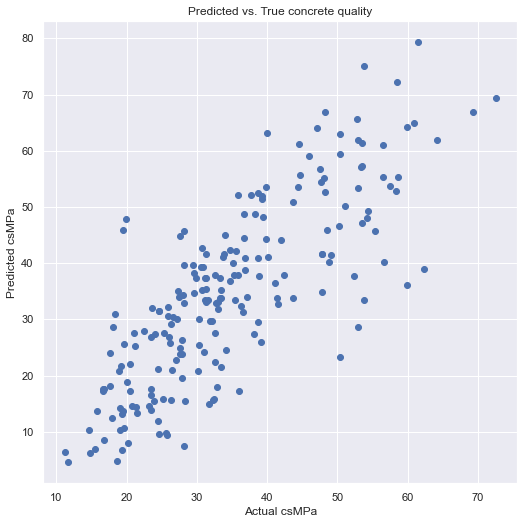

In [57]:
plt.scatter(Y_test_pred,Y_test)
plt.title('Predicted vs. True concrete quality')
plt.xlabel('Actual csMPa')
plt.ylabel('Predicted csMPa')
plt.show